In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np

In [ ]:
import os
# Path to the dataset directory in Google Drive
dataset_dir = '/content/drive/My Drive/braintumordataset'
# List files in the dataset directory
file_list = os.listdir(dataset_dir)

print(file_list[:5])


['Testing', 'Training']


In [ ]:
# Path to the directories containing training and testing data
train_datasets = "/content/drive/MyDrive/braintumordataset/Training"
validation_datasets = "/content/drive/MyDrive/braintumordataset/Testing"

In [ ]:
batch_size = 16
image_size = 224
epochs= 20

In [ ]:
def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):

    train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  fill_mode = "nearest")


    validation_datasets_generator = ImageDataGenerator(rescale=1.0/255)


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = train_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = validation_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )


    return train_datasets_generator_data, validation_datasets_generator_data

In [ ]:
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense


# Loading pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freezing the layers of the pre-trained VGG19 model
for layer in base_model.layers:
    layer.trainable = False

# Building custom model on top of the pre-trained VGG19
model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))  # Dropout layer with dropout rate of 0.6
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14979396 (57.14 MB)
Trainable params: 264708 (1.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________

In [ ]:
model_checkpoint_filpath4 = "model_checkpoint.h5"
callbacks_checkpoints4 = ModelCheckpoint(

    filepath = model_checkpoint_filpath4,
    save_weights_only = True,
    monitor = "val_accuracy",
    mode = "max",
    save_best_only = True
)

In [ ]:
history = model.fit(train_data,
                    steps_per_epoch = len(train_data),
                    epochs = epochs,
                    validation_data = validation_data,
                    validation_steps = len(validation_data),
                    callbacks = [callbacks_checkpoints4]
                    )

Epoch 1/20
180/180 [==============================] - 61s 316ms/step - loss: 1.1169 - accuracy: 0.5268 - val_loss: 1.3081 - val_accuracy: 0.4442
Epoch 2/20
180/180 [==============================] - 54s 301ms/step - loss: 0.8071 - accuracy: 0.6641 - val_loss: 1.4942 - val_accuracy: 0.4645
Epoch 3/20
180/180 [==============================] - 53s 297ms/step - loss: 0.7271 - accuracy: 0.7024 - val_loss: 1.3169 - val_accuracy: 0.5127
Epoch 4/20
180/180 [==============================] - 53s 293ms/step - loss: 0.6800 - accuracy: 0.7331 - val_loss: 1.2071 - val_accuracy: 0.5406
Epoch 5/20
180/180 [==============================] - 53s 294ms/step - loss: 0.6526 - accuracy: 0.7341 - val_loss: 1.4617 - val_accuracy: 0.5330
Epoch 6/20
180/180 [==============================] - 58s 321ms/step - loss: 0.6078 - accuracy: 0.7659 - val_loss: 1.3260 - val_accuracy: 0.5330
Epoch 7/20
180/180 [==============================] - 53s 292ms/step - loss: 0.5899 - accuracy: 0.7655 - val_loss: 1.4815 - val_ac

In [ ]:
loss, accuracy = model.evaluate(validation_data, batch_size=batch_size)


25/25 [==============================] - 3s 124ms/step - loss: 1.1435 - accuracy: 0.6447


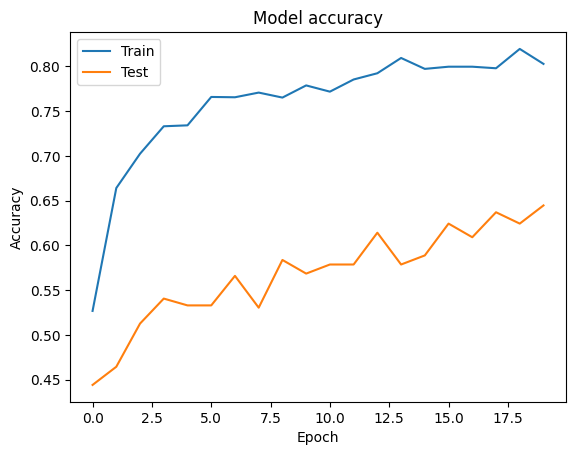

In [ ]:
import matplotlib.pyplot as plt

# Ploting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

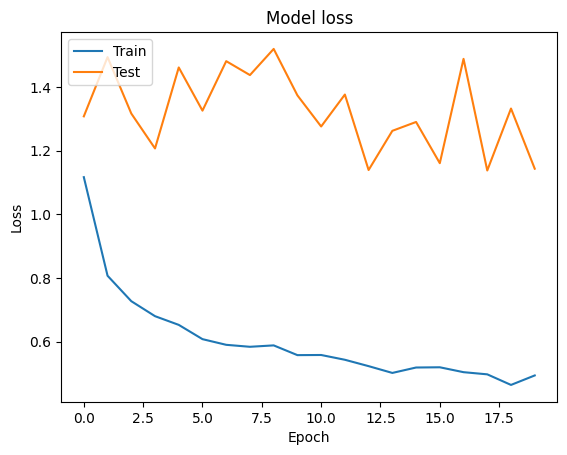

In [ ]:
# Ploting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
pickle.dump(model,open('/content/model_saved','wb'))